In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from google.colab import drive;

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Apuntes/BigData_Sistemas/EDA/heart.csv", sep = ',')

### **Información sobre o significado dos datos**

**Age**: Idade

**Sex**: Sexo

*   M: Masculino
*   F: Femenino

**ChestPainType**: 

*   TA: Angina típica
*   ATI: Angina atípica
*   NAP: Sin angina
*   ASY: Asintomático

**RestingBP**: Presión sanguínea en reposo

**Cholesterol**: Colesterol

**FastingBS**: Nivel de glucosa en sangue en ayunas

*   1: Superior a 120 mg/dl
*   0: Inferior ou igual a 120 mg/dl

**RestingECG**: Resultados do electrocardiograma en reposo

**MaxHR**: Pulsacións máximas

**ExerciseAngina**: Angina inducida polo exercicio
* Y: Sí
* N: No

**Oldpeak**

**ST_Slope**:

*   Up: Pendiente ascendente
*   Flat: Plano
*   Down: Pendiente descendente

**HeartDisease**

*   1: Problema de corazón
*   0: Normal



# **Estudio inicial do dataset**



In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


**Número de líneas e colunmas**

In [5]:
df.shape

(918, 12)

**Nomes das columnas e tipo de datos**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Comprobo se hai nulos**

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Comprobo se existe algunha fila duplicada**

In [8]:
print(f'Filas duplicadas = {df.duplicated().sum()}')

Filas duplicadas = 0


**Miro a cantidade de valores únicos en cada columna**

In [9]:
df.nunique(axis=0)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

**Clasifico as columnas en numéricas e categóricas**

In [10]:
cat = list(df.select_dtypes(include=['object']).columns)
num = list(df.select_dtypes(exclude=['object']).columns)

print(f'Categoricas = {cat}')
print(f'Numéricas = {num}')

Categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numéricas = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


**Modifico as listas de columnas porque considero que HeartDisease e FastingBS tamén son categóricas**

In [11]:
cat.append('FastingBS')
cat.append('HeartDisease')
num.remove('FastingBS')
num.remove('HeartDisease')

print(f'Categoricas = {cat}')
print(f'Numéricas = {num}')

Categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']
Numéricas = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


# **Traballo sobre as columnas categóricas**

**Creo un dataframe só coas categóricas**

In [12]:
df_cat = df[cat]

df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS,HeartDisease
0,M,ATA,Normal,N,Up,0,0
1,F,NAP,Normal,N,Flat,0,1
2,M,ATA,ST,N,Up,0,0
3,F,ASY,Normal,Y,Flat,0,1
4,M,NAP,Normal,N,Up,0,0


**Fago unha limpeza das columnas que conteñen strings por se tivesen espacios extra**

In [13]:
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Comprobo a distribución dos datos**

In [28]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Sex'].value_counts().values.tolist(), 
                      x = df['Sex'].value_counts().index, 
                      text=df['Sex'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Sex'].value_counts().keys(),
                             values=df['Sex'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])


fig.update_layout(
                    title=dict(text = "Distribución por xénero",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

* O 79% dos datos pertencen a homes

In [29]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ChestPainType'].value_counts().values.tolist(), 
                      x = df['ChestPainType'].value_counts().index, 
                      text=df['ChestPainType'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ChestPainType'].value_counts().keys(),
                             values=df['ChestPainType'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,530])


fig.update_layout(
                    title=dict(text = "Tipo de dolor de peito",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

* O 54% das persoas son asintomáticas
* O 22.1% das persoas non teñen angina de peito
* O 18.8% ten unha angina típica
* O 5.01% ten unha angina atípica

In [30]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['FastingBS'].value_counts().values.tolist(), 
                      x = df['FastingBS'].value_counts().index, 
                      text=df['FastingBS'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['FastingBS'].value_counts().keys(),
                             values=df['FastingBS'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])


fig.update_layout(
                    title=dict(text = "Nivel de glucosa en sangue en ayunas",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

* O 76.7% das persoas teñen un nivel de glucosa en sangue normal, é dicir, por debaixo de 120 mg/dl
* O 23.3% das persoas ten un nivel elevado de glucosa en sangue

In [31]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['RestingECG'].value_counts().values.tolist(), 
                      x = df['RestingECG'].value_counts().index, 
                      text=df['RestingECG'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['RestingECG'].value_counts().keys(),
                             values=df['RestingECG'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])
 

fig.update_layout(
                    title=dict(text = "Resultados do electrocardiograma en reposo",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

* O 60.1% das persoas obtén unhos resultados normais a hora de facer o electrocardiograma
* O 20.5% ten hipertrofia ventricular izquierda probable o definitiva
* O 19.4% ten unha frecuencia cardíaca anormal

In [38]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ExerciseAngina'].value_counts().values.tolist(), 
                      x = df['ExerciseAngina'].value_counts().index, 
                      text=df['ExerciseAngina'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ExerciseAngina'].value_counts().keys(),
                             values=df['ExerciseAngina'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])
#Changing plot & figure background 
fig.update_layout(
                    title=dict(text = "Angina inducida polo exercicio",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

* O 59.6% das persoas ten angina inducida polo exercicio
* O 40.4% das persoas non ten angina inducida polo exercicio

In [40]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ST_Slope'].value_counts().values.tolist(), 
                      x = df['ST_Slope'].value_counts().index, 
                      text=df['ST_Slope'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ST_Slope'].value_counts().keys(),
                             values=df['ST_Slope'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,500])
#Changing plot & figure background 
fig.update_layout(
                    title=dict(text = "Pendiente ST/frecuencia cardíaca",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [41]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['HeartDisease'].value_counts().values.tolist(), 
                      x = df['HeartDisease'].value_counts().index, 
                      text=df['HeartDisease'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['HeartDisease'].value_counts().keys(),
                             values=df['HeartDisease'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,550])
#Changing plot & figure background 
fig.update_layout(
                    title=dict(text = "Problema de corazón",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

* O 55.3% das persoas tivo problemas de corazón
* O 44.7% das persoas non tivo problemas de corazón

**Comprobo a relación entre o sexo e o resto de columnas**

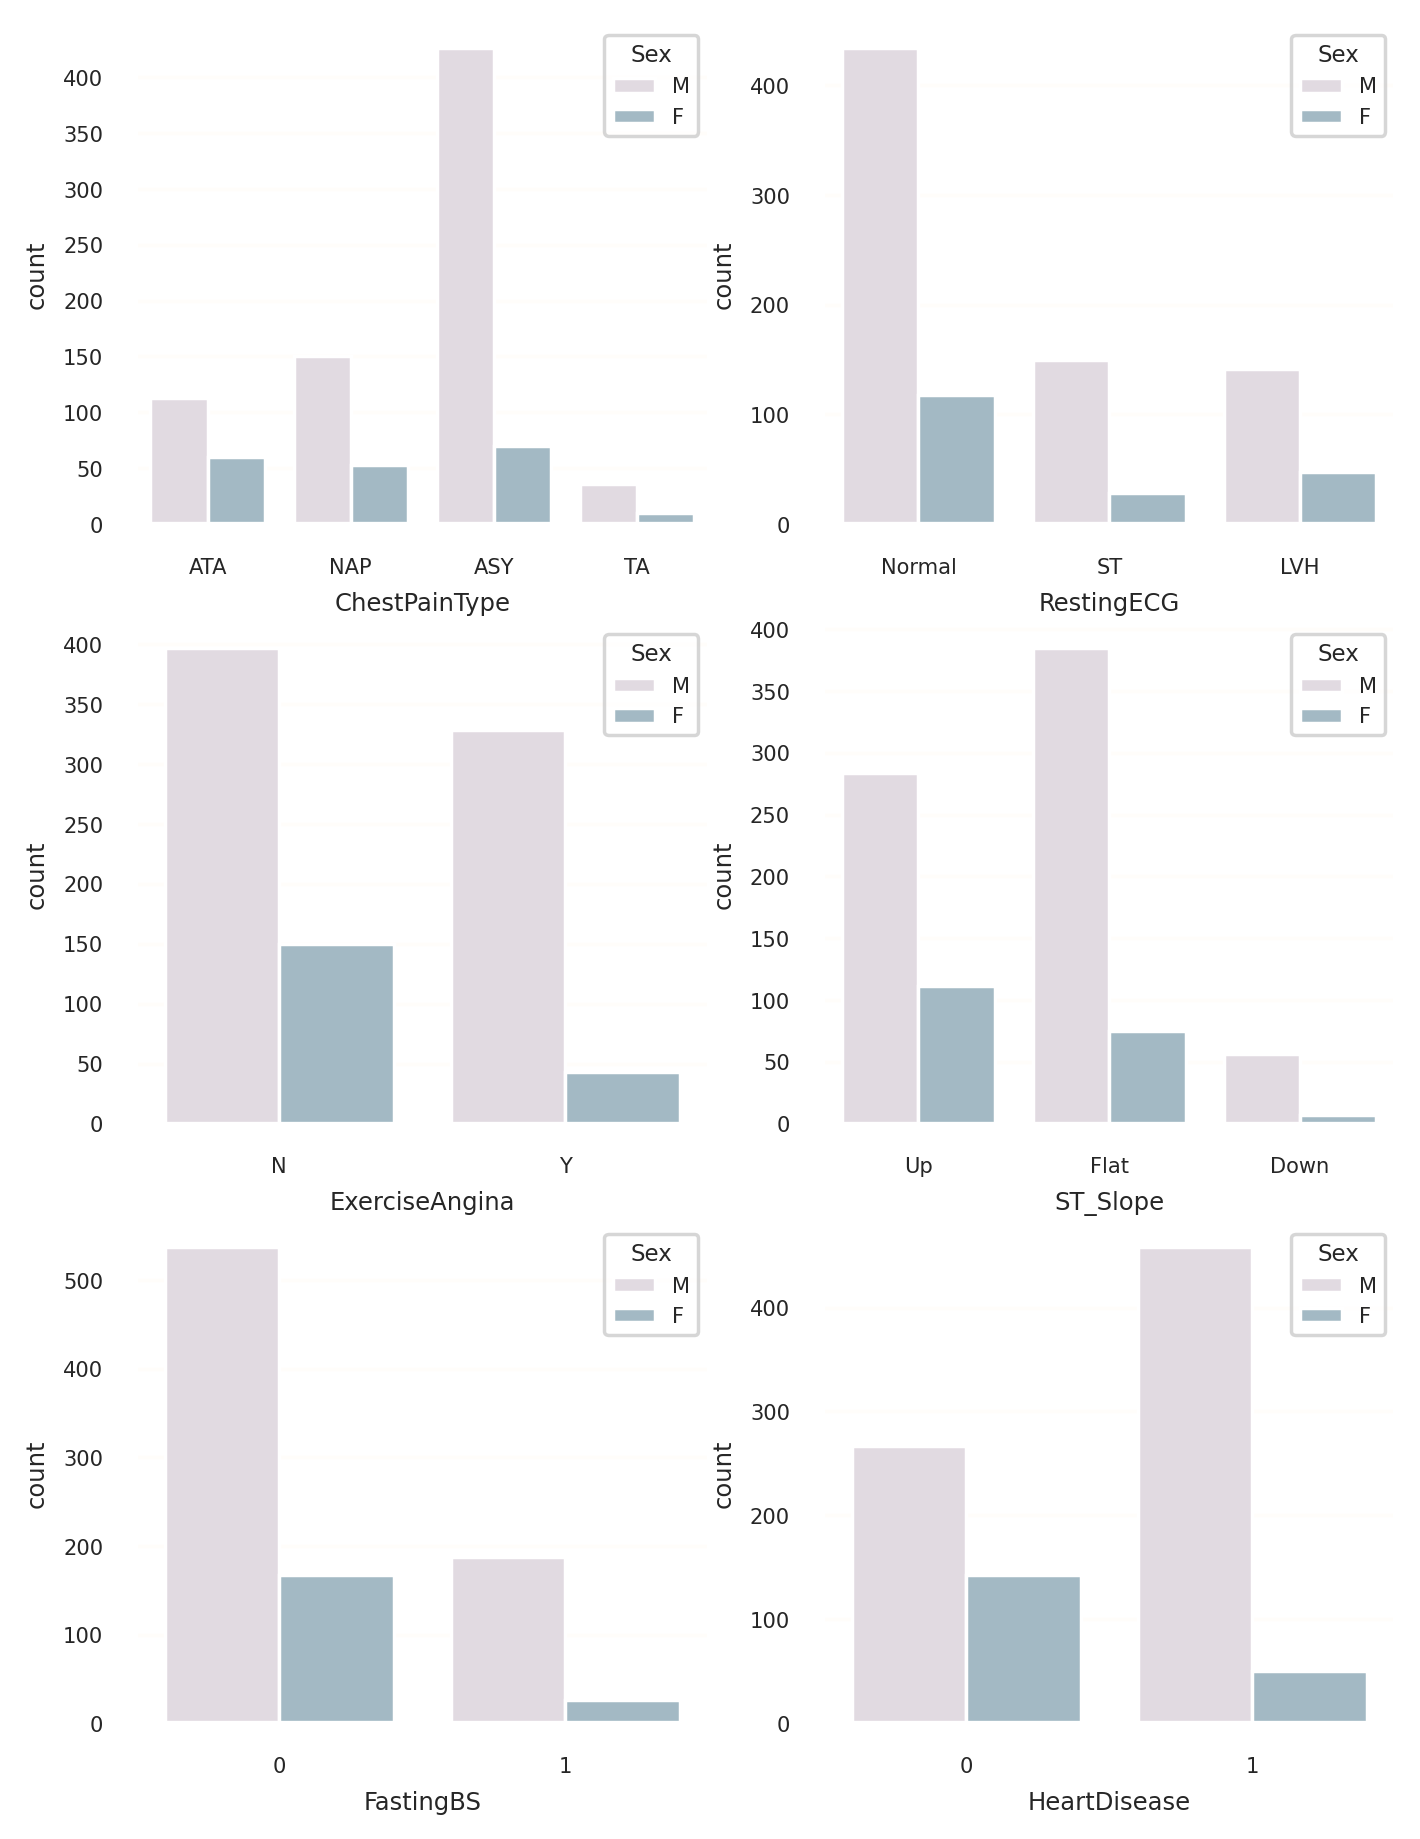

In [105]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#FFFFFF', 'grid.color': '#fffdfa'}, font_scale = 0.55)
fig, ax = plt.subplots(3, 2, figsize = (6.5, 9))
for indx, (column, axes) in list(enumerate(list(zip(cat[1:], ax.flatten())))):
    sns.countplot(ax = axes, x = df[column], hue = df['Sex'], palette = colors, alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'Sex', loc = 'upper right')
axes_legend[2].legend(title = 'Sex', loc = 'upper right')
plt.show()

* Ainda que a primeira vista parece que os homes son máis propensos a ter un ataque o corazón, na miña opinióc estos datos non son fiables. Xa que o 79% dos datos recolectados neste dataset son de homes

**Comprobo a relación entre os problemas de corazón e o resto das columnas**

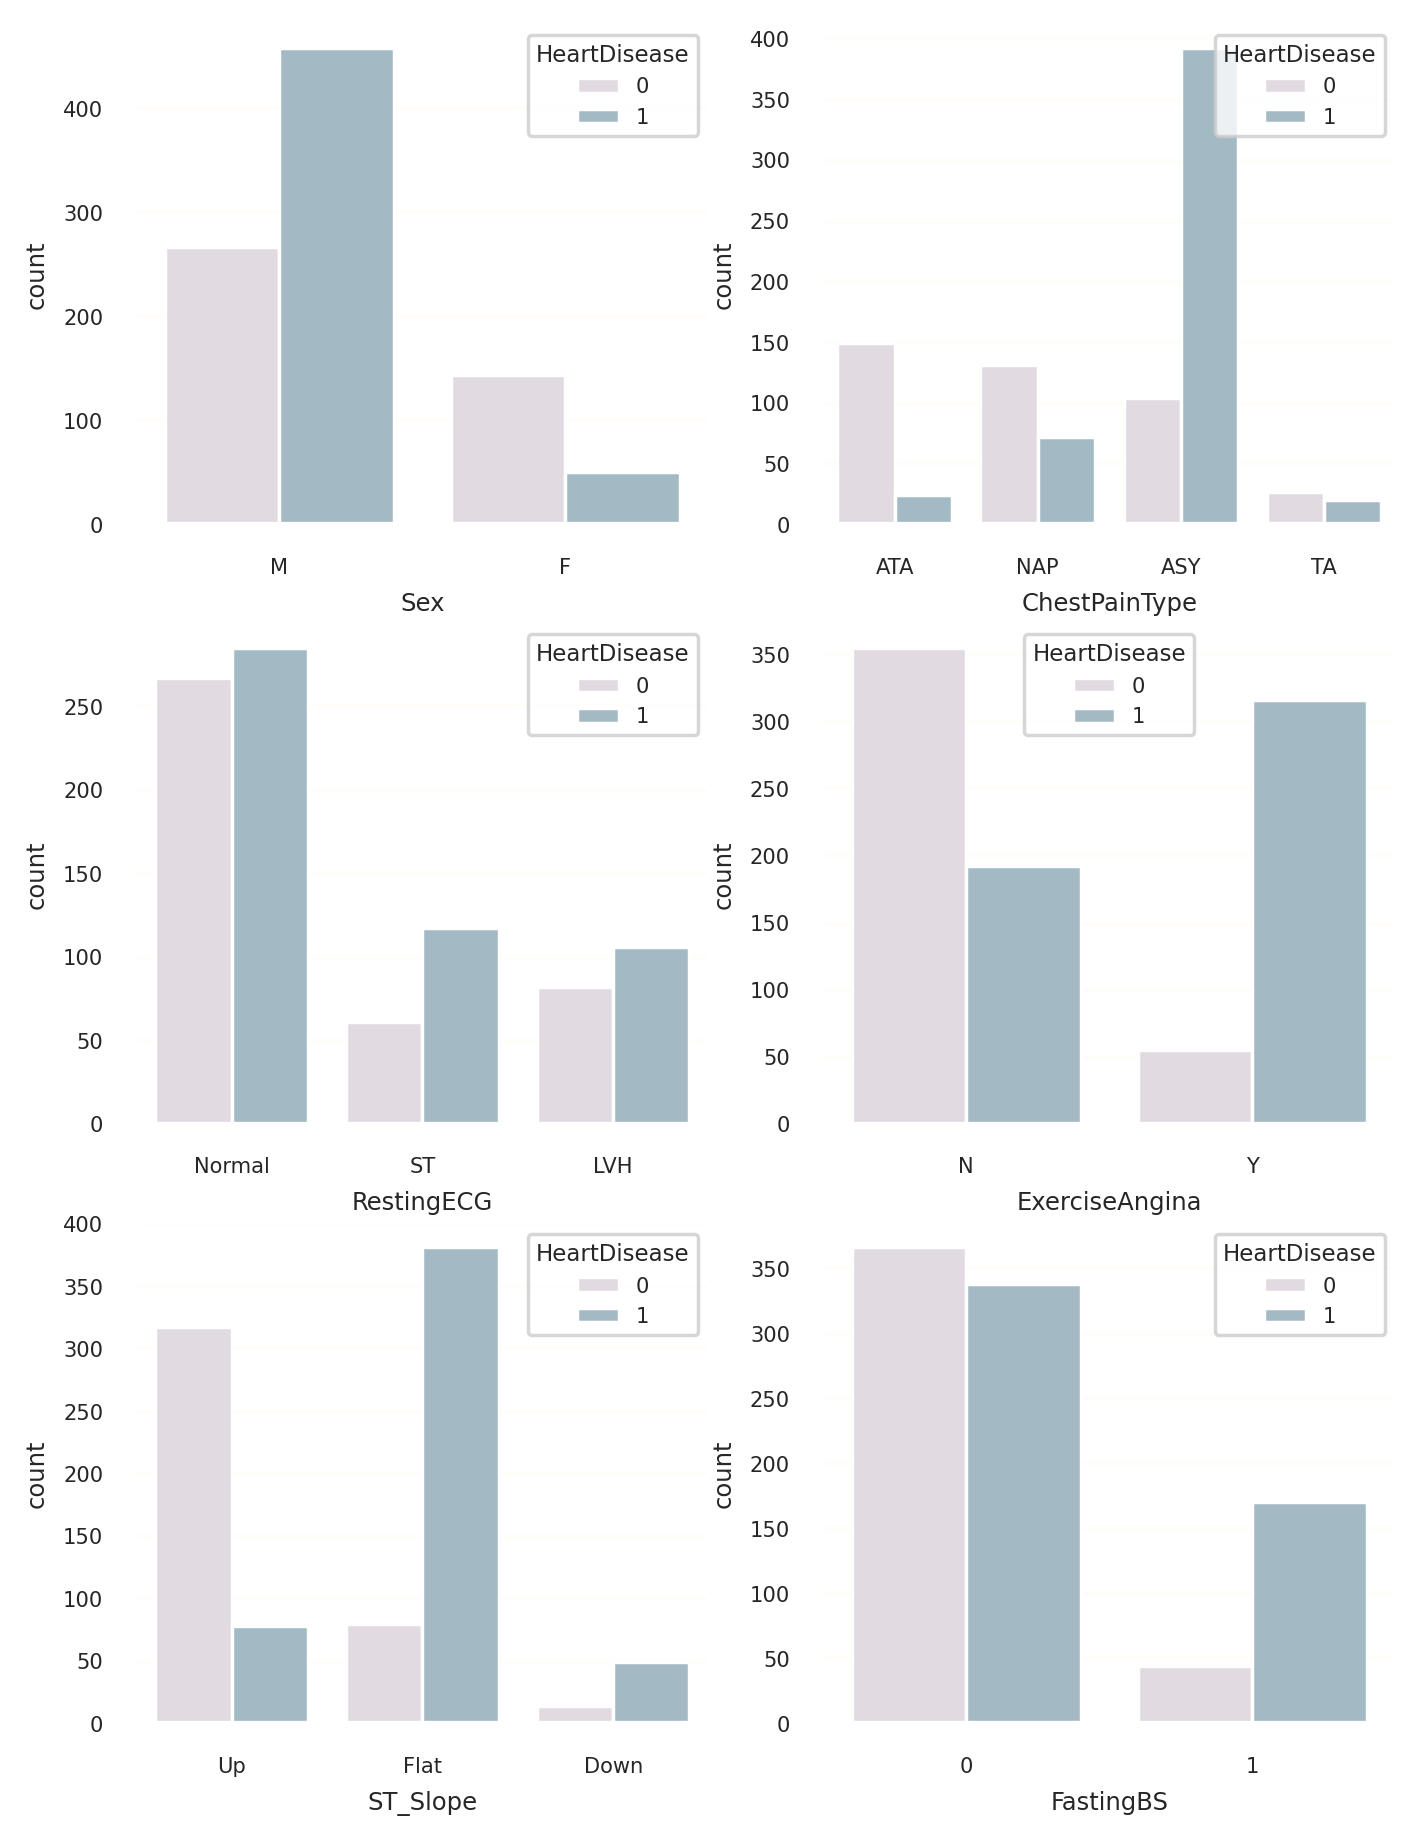

In [53]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#FFFFFF', 'grid.color': '#fffdfa'}, font_scale = 0.55)
fig, ax = plt.subplots(3, 2, figsize = (6.5, 9))
for indx, (column, axes) in list(enumerate(list(zip(cat, ax.flatten())))):
    if column not in 'HearDisease':
        sns.countplot(ax = axes, x = df[column], hue = df['HeartDisease'], palette = colors, alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'HeartDisease', loc = 'upper right')
axes_legend[2].legend(title = 'HeartDisease', loc = 'upper right')
plt.show()

* No caso do tipo de dor de peito, podese observar que a maioria das persoas que sofren dun problema de corazón son asintomáticas
* En relación coa azucre en sange, en caso de tela por debaixo dos 120ml/dl non sería un factor determinante. Pero no caso de tela altá aumentaría a probabilidade de ter problemas de corazón 
* Tamén aumentarían as posibilidades de ter problemas de corazón se se obteñen resultados anormales no electrocardiograma
* Se ha persona non ten anginas de peito cuando fai exercicio as posibilidades de ter problemas de corazón reducirianse un pouco. Pero se has tivese a probabilidade de ter problemas de corazon aumentaría considerablemente

# **Traballo sobre as columnas numéricas**

In [54]:
df_num = df[num]

df_num.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [55]:
df_num.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


**Distribución dos datos numéricos**

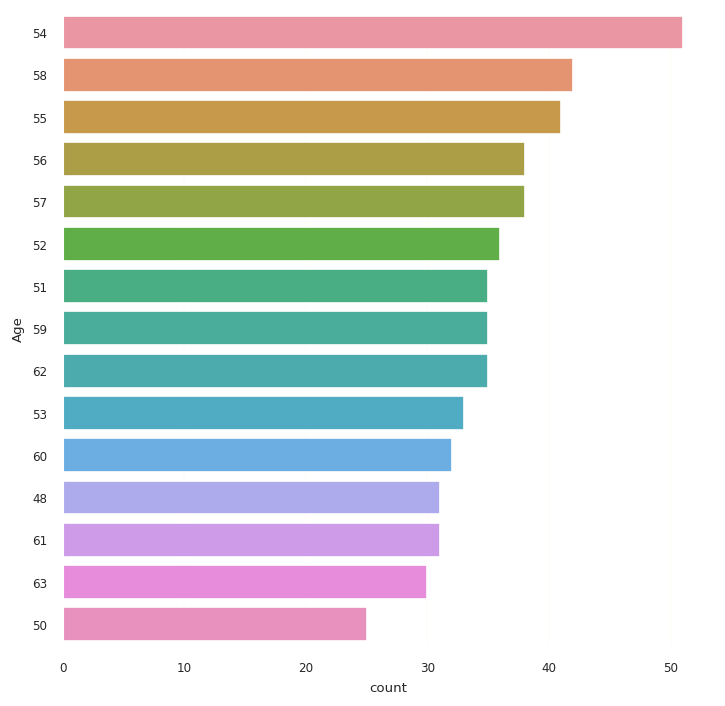

In [123]:
plt.figure(figsize=(7,7))
sns.countplot(data=df_num, y="Age", order = df_num['Age'].value_counts().iloc[:15].index)

* Pódese observar que no dataset as idades máis comúns están entre os 50 e 60 anos

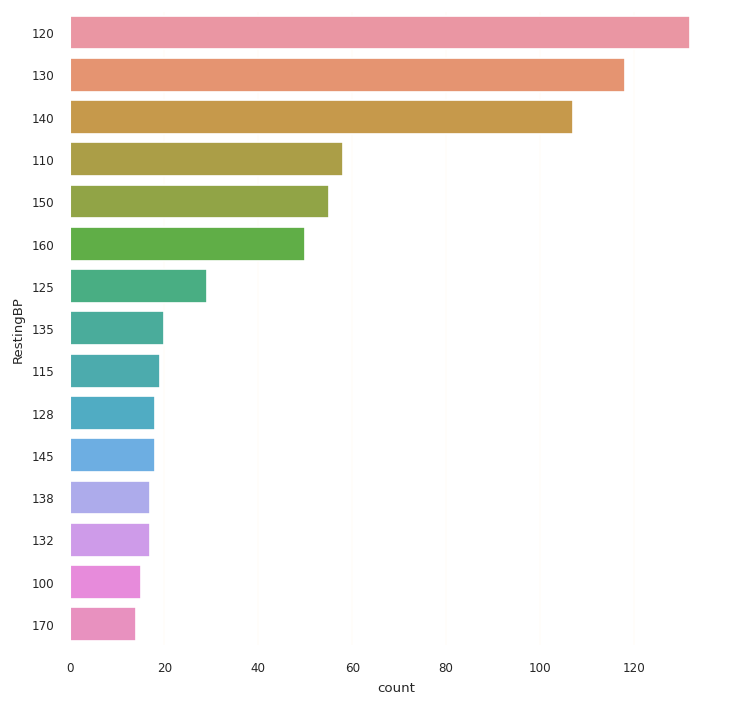

In [124]:
plt.figure(figsize=(7,7))
sns.countplot(data=df_num, y="RestingBP", order = df_num['RestingBP'].value_counts().iloc[:15].index)

* A presión sanguínea máis común vai desde os 120 aos 140

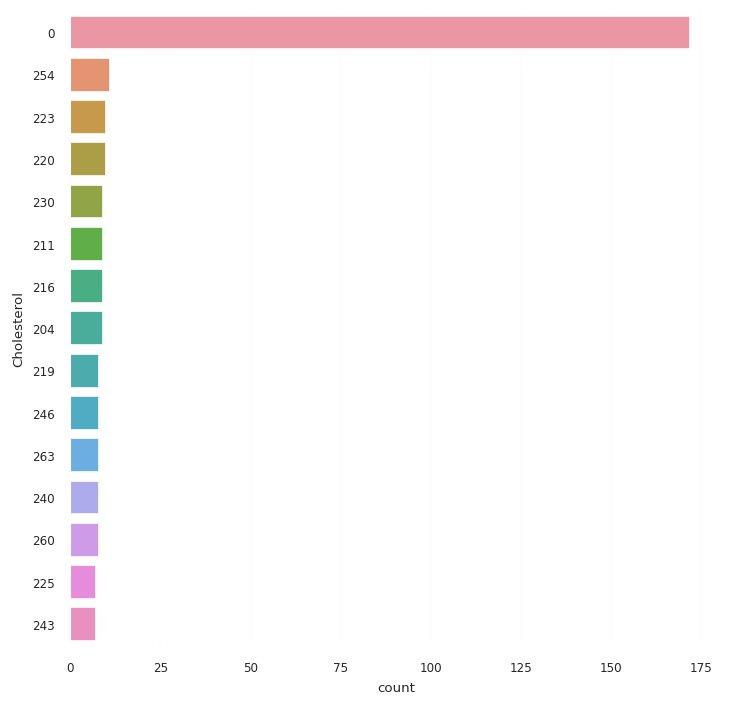

In [125]:
plt.figure(figsize=(7,7))
sns.countplot(data=df_num, y="Cholesterol", order = df_num['Cholesterol'].value_counts().iloc[:15].index)

* No caso do colesterol o valor máis común é 0, o que me fai pensar que é un outlier. E se descartamos ese otulier os valores máis comúns están por encima de 230

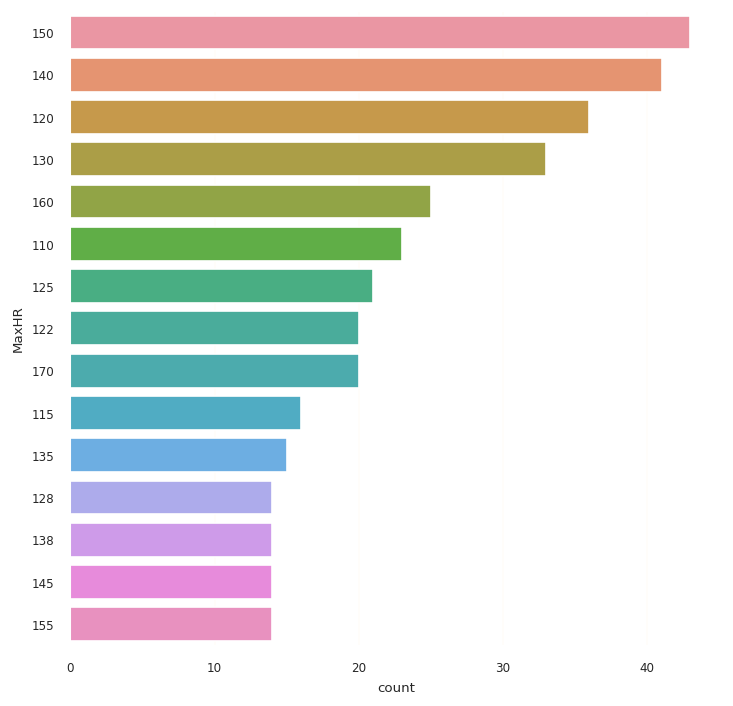

In [126]:
plt.figure(figsize=(7,7))
sns.countplot(data=df_num, y="MaxHR", order = df_num['MaxHR'].value_counts().iloc[:15].index)

* As pulsacións máximas rondan os 150 que é un valor normal

**Correlacións entre as cuolumnas numéricas**


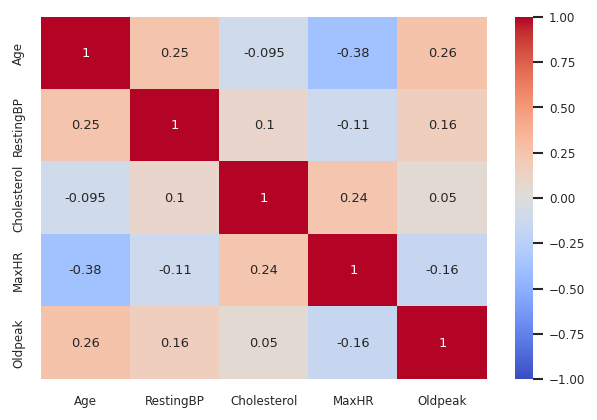

In [97]:
sns.heatmap(df_num.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

**Correlacións máis importantes**
  * Podese obervar que a medida que aumenta a idade diminue o número máximo de pulsacións
  * Se a persona ten o colesterol alto aumentarán as súas pulsacións máximas
  * Ca idade vai aumentando o nivel de glucosa en sangue


**Busco outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

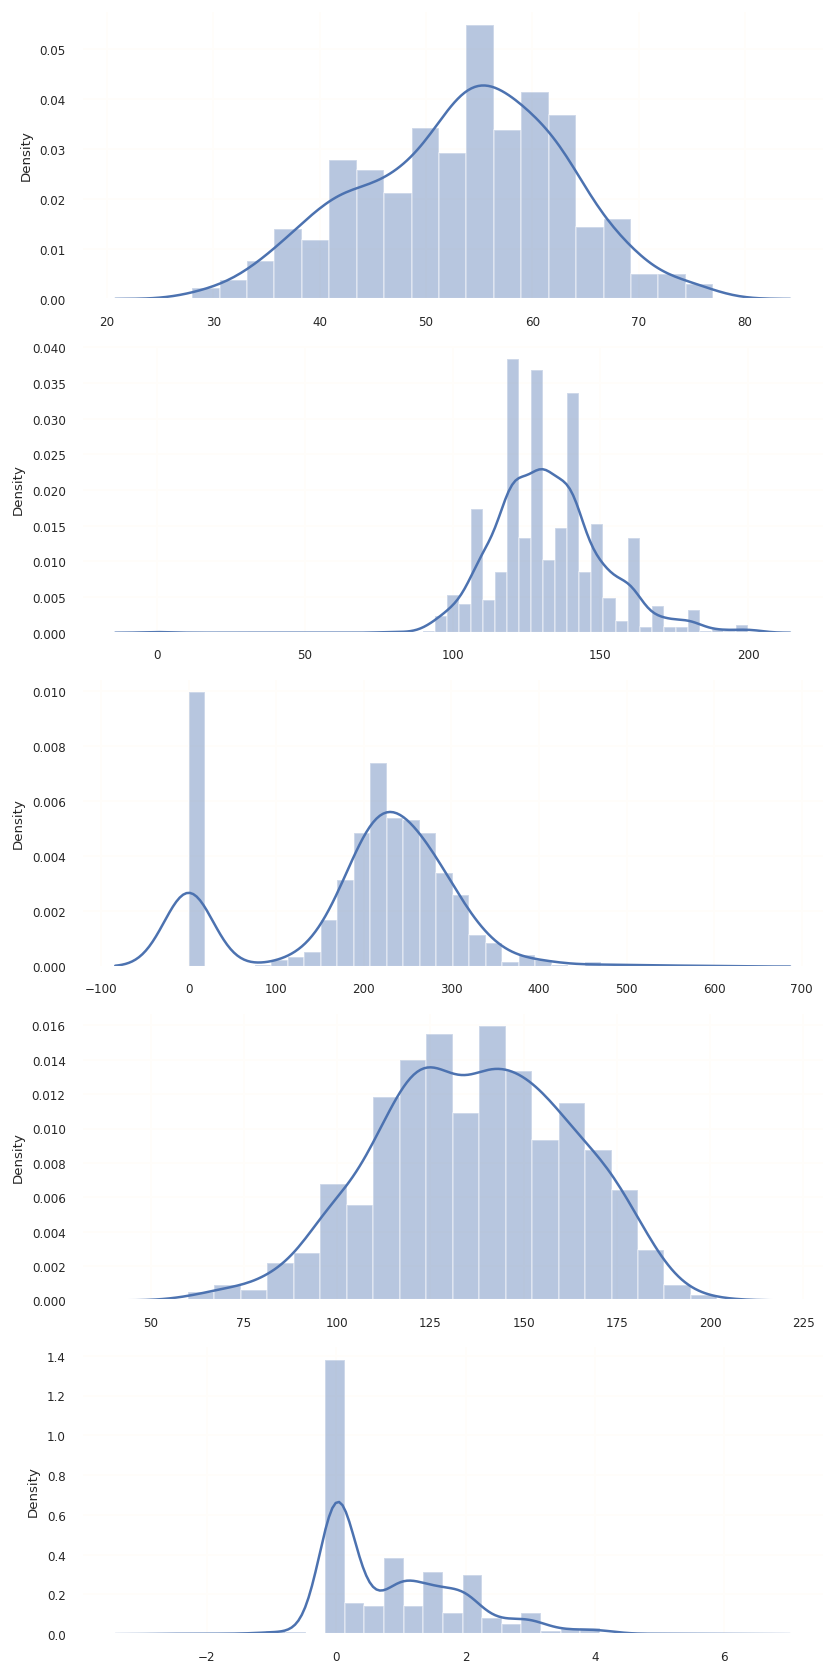

In [88]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#FFFFFF', 'grid.color': '#fffdfa'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
  
    sns.distplot(ax = axes, x = df[column])
    
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()


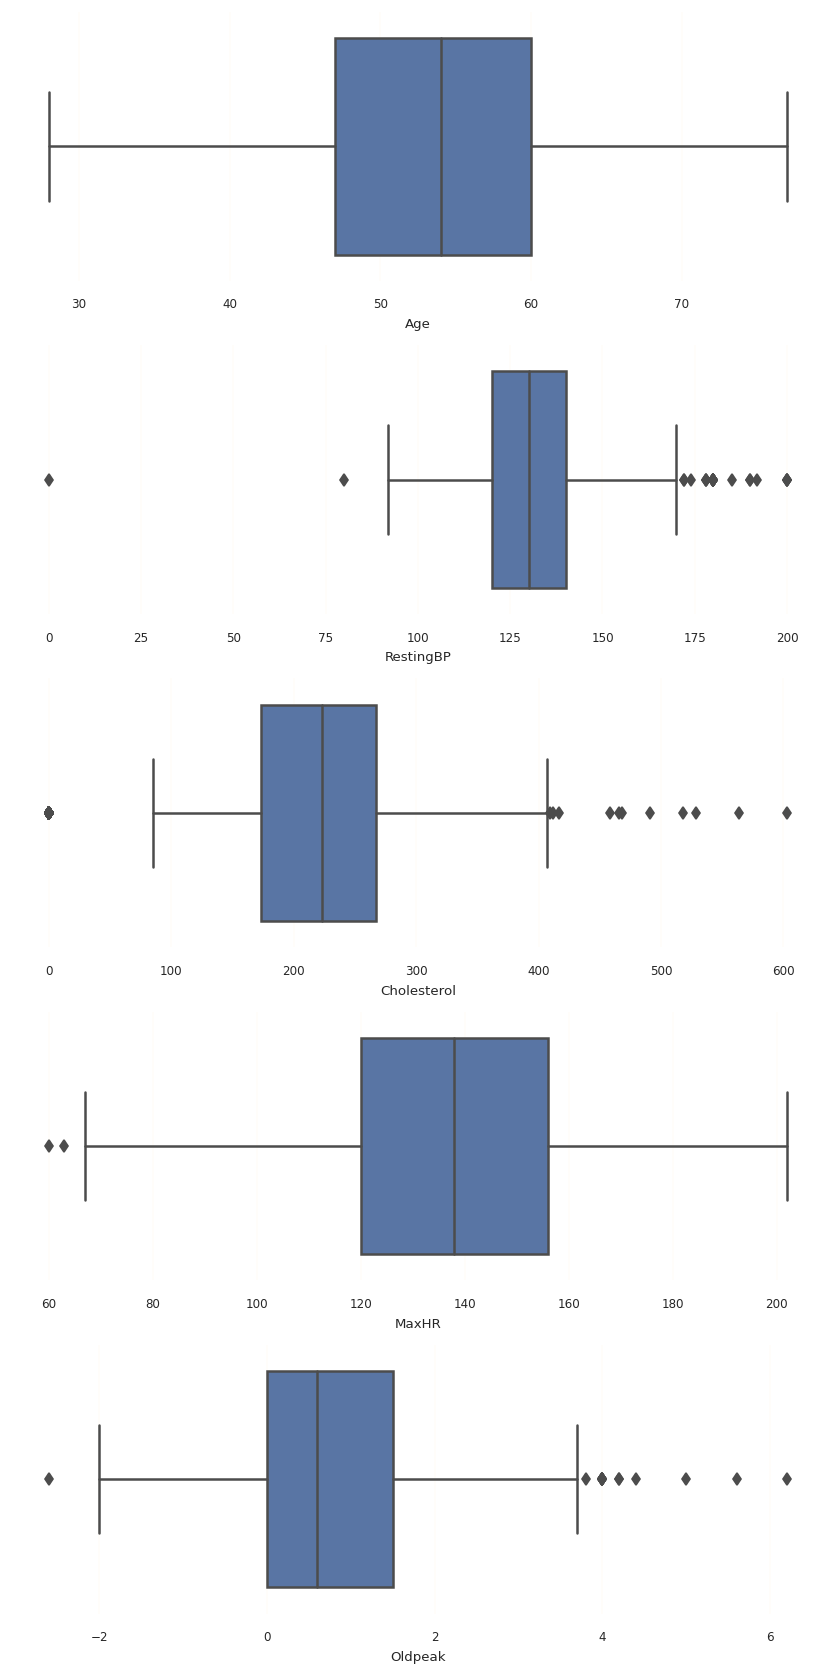

In [89]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#FFFFFF', 'grid.color': '#fffdfa'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
  
    sns.boxplot(ax = axes, x = df[column], orient = 'h')
    
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()


* Baseandome nas gráficas anteriores entendo que hai outliers nas columnas de 'RestingBP', 'Cholesterol', 'MaxHR' e 'Oldpeak'

In [107]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            pass
        else:
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Hai',x+y,'outliers na columna',i)
global a
a = []
for i in num:
    count_outliers(df,i)

Hai 28 outliers na columna RestingBP
Hai 183 outliers na columna Cholesterol
Hai 2 outliers na columna MaxHR
Hai 16 outliers na columna Oldpeak


In [127]:
df_cat.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'FastingBS', 'HeartDisease'],
      dtype='object')

# **Relación entre o sexo e as columnas numéricas**

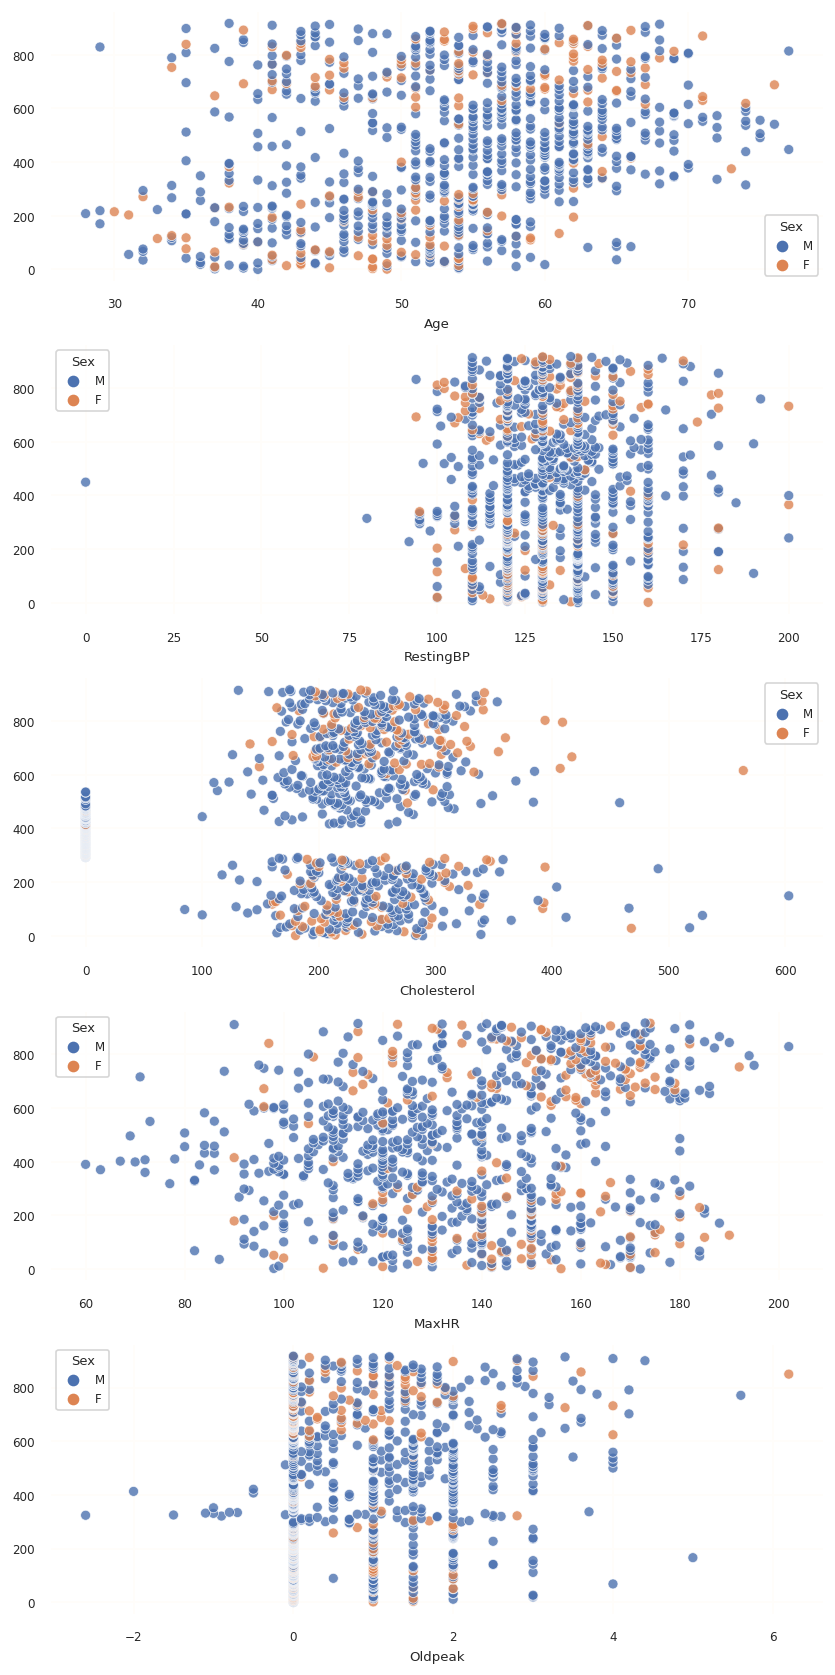

In [128]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#FFFFFF', 'grid.color': '#fffdfa'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
    
    sns.scatterplot(ax = axes, y = df[column].index, x = df[column], 
                    hue = df['Sex'], alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

* Neste caso nonse podería facer unha comparación xusta porque o 79% dos datos pertencen a homes

# **Relación entre angina de peito ao exercitarse e as columnas numéricas**

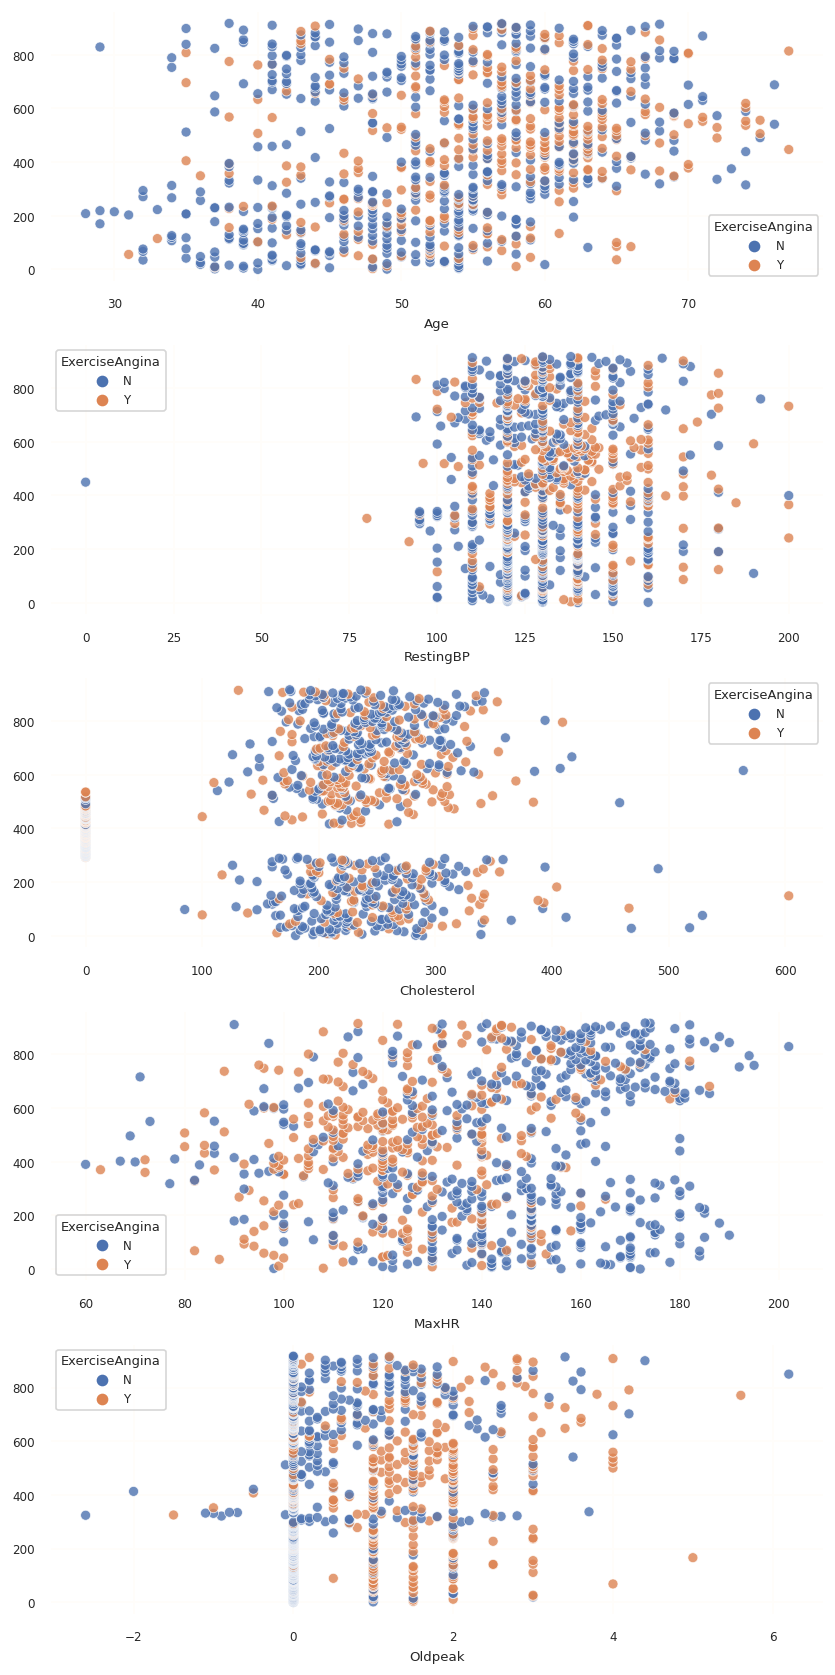

In [131]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#FFFFFF', 'grid.color': '#fffdfa'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
    
    sns.scatterplot(ax = axes, y = df[column].index, x = df[column], 
                    hue = df['ExerciseAngina'], alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

* Neste caso veise que as persoas que tenen angina de peito cuando se exercitan teñen as pulsacións máximas máis baixas

# **Relación entre problemas de corazón e as columnas numéricas**

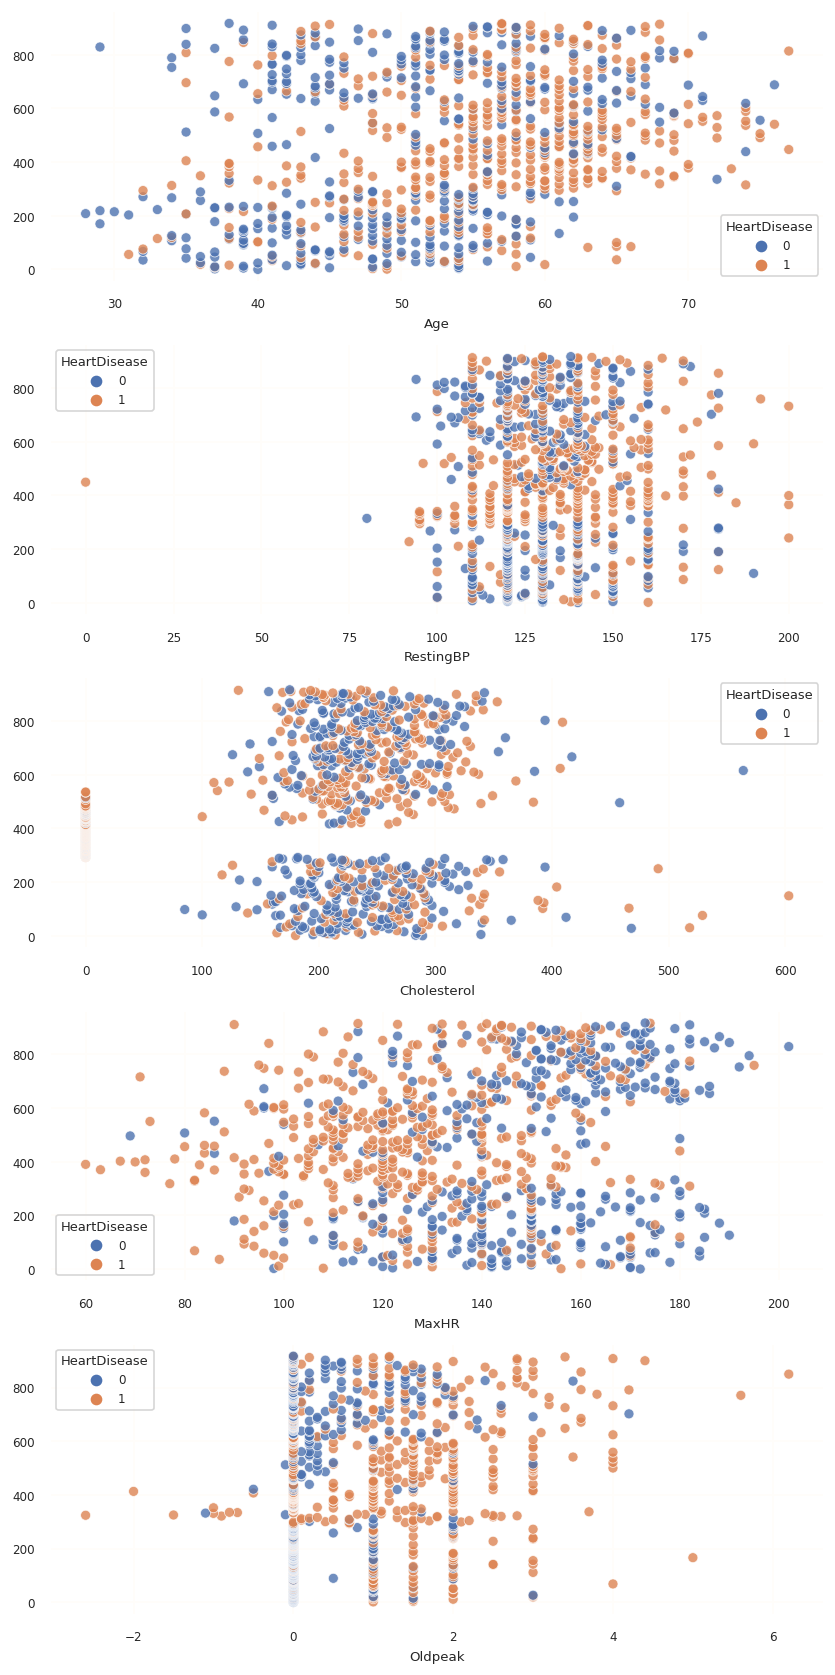

In [104]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#FFFFFF', 'grid.color': '#fffdfa'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
    
    sns.scatterplot(ax = axes, y = df[column].index, x = df[column], 
                    hue = df['HeartDisease'], alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

**Segundo as gráficas superiores pódese observar o seguite**

* Nalgunhas columnas, como por exemplo a de 'Cholesterol'
* A medida que vai aumentando a idade tamén aumenta a posibilidade de ter problemas de corazón
* Non parece haber unha relación clara entre a presión sanguínea en reposo ou o colesterol e os problemas de corazón
* Cuanto ñáis baixas sexan as túas pulsacións máximas máis probable e ter problemas de corazón